# Import các thư viện cần thiết

In [11]:
# Libraries
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

DATA_ROOT_DIR = os.path.dirname(os.getcwd())
DATA_ROOT_DIR

'/home/tunv/Desktop/predict-pm2.5-hcm'

# Xử lý dữ liệu khí tượng

Gộp (concat) tất cả các file data khí tượng.

In [12]:
path = DATA_ROOT_DIR + "/data/raw_data/hcm_meteorological_data"

all_df = pd.DataFrame(columns=['STN()', 'TIME(DD/HHMM)', 'ALTM(hPa)', 'TMP(C)', 'DEW(C)', 'RH(%)', 'DIR(deg)', 'SPD(m/s)', 'VIS(km)', 'CLOUDS()', 'NA_0()', 'Weather()'])

for filename in glob.glob(os.path.join(path, '*.csv')):
  tmp_df = pd.read_csv(filename)

  # Chỉnh sửa cột `TIME(DD/HHMM)` theo đúng format quy ước
  for i in range(len(tmp_df['TIME(DD/HHMM)'])):
    tmp_df['TIME(DD/HHMM)'][i] = filename[-12:-8] + "-" + filename[-8:-6] + "-" + filename[-6:-4] + " " + tmp_df['TIME(DD/HHMM)'][i][-4:-2] + ":" +  tmp_df['TIME(DD/HHMM)'][i][-2:]

  # Gộp tất cả data lại
  all_df = pd.concat([all_df, tmp_df], ignore_index=True)

# Xóa các dòng trùng giá trị cột `TIME(DD/HHMM)`
all_df.drop_duplicates(subset=['TIME(DD/HHMM)'], inplace=True, ignore_index=True)
all_df.head()

,STN(),TIME(DD/HHMM),ALTM(hPa),TMP(C),DEW(C),RH(%),DIR(deg),SPD(m/s),VIS(km),CLOUDS(),NA_0(),Weather(),NA_1(),GUS(m/s)
0,VVTS,2021-08-24 05:00,1007.0,31,25,70,220.0,4,6.0,BKN017,FEW020,-SHRA,NaN,NaN
1,VVTS,2021-08-24 04:30,1007.0,32,25,67,NaN,2,10.0,BKN017,FEW020,-SHRA,NaN,NaN
2,VVTS,2021-08-24 04:00,1007.0,31,25,70,250.0,4,10.0,BKN017,NaN,NaN,NaN,NaN
3,VVTS,2021-08-24 03:30,1007.0,32,25,67,230.0,3,10.0,BKN017,NaN,NaN,NaN,NaN
4,VVTS,2021-08-24 03:00,1008.0,31,26,75,240.0,4,10.0,BKN017,NaN,NaN,NaN,NaN


In [13]:
all_df[~all_df["Weather()"].isna()]

,STN(),TIME(DD/HHMM),ALTM(hPa),TMP(C),DEW(C),RH(%),DIR(deg),SPD(m/s),VIS(km),CLOUDS(),NA_0(),Weather(),NA_1(),GUS(m/s)
0,VVTS,2021-08-24 05:00,1007.0,31,25,70,220.0,4,6.0,BKN017,FEW020,-SHRA,NaN,NaN
1,VVTS,2021-08-24 04:30,1007.0,32,25,67,NaN,2,10.0,BKN017,FEW020,-SHRA,NaN,NaN
33,VVTS,2021-08-24 12:30,1008.0,26,25,94,90.0,2,10.0,SCT017,BKN050,-RA,NaN,NaN
34,VVTS,2021-08-24 12:00,1008.0,26,26,100,NaN,2,10.0,SCT017,BKN050,-RA,NaN,NaN
40,VVTS,2021-08-24 09:00,1006.0,25,23,89,270.0,6,5.0,SCT015,FEW017,SHRA,SCT050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51923,VVTS,2020-09-18 11:00,1003.0,27,25,89,240.0,4,6.0,BKN013,SCT015,-SHRA,NaN,NaN
51924,VVTS,2020-09-18 10:30,1002.0,28,25,84,260.0,7,3.0,BKN013,SCT015,SHRA,NaN,NaN
51926,VVTS,2020-09-18 09:30,1001.0,30,25,75,340.0,3,8.0,SCT015,FEW017,-SHRA,BKN050,NaN
51927,VVTS,2020-09-18 09:00,1001.0,32,25,67,280.0,4,10.0,SCT015,FEW017,-SHRA,NaN,NaN


In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52123 entries, 0 to 52122
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STN()          52123 non-null  object 
 1   TIME(DD/HHMM)  52123 non-null  object 
 2   ALTM(hPa)      52095 non-null  object 
 3   TMP(C)         52116 non-null  object 
 4   DEW(C)         52107 non-null  object 
 5   RH(%)          52107 non-null  object 
 6   DIR(deg)       40559 non-null  object 
 7   SPD(m/s)       52115 non-null  object 
 8   VIS(km)        52081 non-null  object 
 9   CLOUDS()       51085 non-null  object 
 10  NA_0()         29728 non-null  object 
 11  Weather()      4102 non-null   object 
 12  NA_1()         2766 non-null   object 
 13  GUS(m/s)       377 non-null    float64
dtypes: float64(1), object(13)
memory usage: 5.6+ MB


## Xử lý tập dữ liệu khí tượng 🎨
> Ta thấy, các cột: `NA_0()`, `Weather()`, `GUS(m/s)` và `NA_1()` có lượng dữ liệu bị thiếu rất lớn là 42,94%, 92,15%, 99,28% và 94,68%. 

> Ngoài ra, cột `DIR(deg)` có lượng dữ liệu bị thiếu là 22,2%, các cột còn lại có lượng dữ liệu bị thiếu không quá 2,02% (cột `CLOUDS()`).

Do đó, ta sẽ tiến hành loại bỏ:
* 4 cột có dữ liệu bị thiếu rất lớn là: `NA_0()`, `Weather()`, `GUS(m/s)` và `NA_1()`.
* Cột `STN()` biểu diễn mã danh của trạm đo lường khí tượng tại Tp. Hồ Chí Minh nên ta cũng sẽ loại bỏ cột này do không ảnh hưởng đến chất lượng mô hình.

Ngoài ra, ta sẽ xử lý một số tác vụ sau: 
* Đổi tên cột
* Xóa dòng thừa
* Sắp xếp theo cột `TIME(DD/HHMM)`

In [15]:
# Xóa cột thừa
all_df = all_df[['TIME(DD/HHMM)', 'ALTM(hPa)', 'TMP(C)', 'DEW(C)', 'RH(%)', 'DIR(deg)', 'SPD(m/s)', 'VIS(km)', 'CLOUDS()']]

# Đổi tên cột
all_df.rename(columns={'TIME(DD/HHMM)':'time',
                       'ALTM(hPa)':'pressure',
                       'TMP(C)':'temperature', 
                       'DEW(C)':'dewpoint_temperature',
                       'RH(%)':'humidity',
                       'DIR(deg)':'wind_direction',
                       'SPD(m/s)':'wind_speed',
                       'VIS(km)':'vision',
                       'CLOUDS()':'clouds'}, inplace=True)

# Xóa dòng thừa
remove = []
for i in range(len(all_df['time'])):
  if all_df['time'][i][-2:] == "30":
    remove.append(i)
all_df.drop(index=remove, inplace=True)
all_df.reset_index(drop=True, inplace=True)

# Sort
all_df.sort_values(by='time', inplace=True, ignore_index=True)
all_df

,time,pressure,temperature,dewpoint_temperature,humidity,wind_direction,wind_speed,vision,clouds
0,2019-01-01 00:00,1013.0,24,18,69,350,4,10.0,SCT015
1,2019-01-01 01:00,1014.0,24,18,69,350,5,10.0,FEW017
2,2019-01-01 02:00,1014.0,25,19,69,350,5,10.0,FEW017
3,2019-01-01 03:00,1014.0,27,19,62,360,6,10.0,SCT017
4,2019-01-01 04:00,1014.0,27,19,62,360,6,10.0,FEW017
...,...,...,...,...,...,...,...,...,...
26030,2021-12-31 19:00,1013.0,24,18,69,50.0,3,10.0,FEW017
26031,2021-12-31 20:00,1013.0,24,18,69,20.0,3,10.0,FEW017
26032,2021-12-31 21:00,1013.0,24,18,69,20.0,3,10.0,FEW017
26033,2021-12-31 22:00,1013.0,23,18,73,30.0,2,10.0,FEW017


In [16]:
# Lưu để ko phải chạy lại
abc_df = all_df.copy()
# all_df = abc_df.copy()

## Đếm tần suất của các cột `CLOUD()` 🚟

### Cột `CLOUD()` 

Cột cloud biểu diễn trạng thái của mây

#### Hàm tính xác suất.

In [17]:
def value_frequency(list):
  counted = Counter(list)
  value_freq = pd.DataFrame(counted.items(),columns=['value','frequency'])
  return value_freq.sort_values(by='frequency',ascending=False,ignore_index=True)

     value  frequency
0   FEW017       7739
1   SCT017       5060
2   SCT015       4254
3   FEW020       2641
4   BKN017       1985
5   FEW015       1689
6   SCT020        823
7   BKN015        628
8      NaN        511
9   BKN020        262
10  SCT013        245
11  BKN013        125
12  FEW023         23
13  BKN010         23
14  SCT010          9
15  SCT023          3
16  FEW013          3
17  FEW050          2
18  SCT***          2
19  BKN050          2
20  FEW018          1
21  SCT050          1
22  BKN***          1
23  SCT037          1
24  FEW***          1
25  SCT009          1
['FEW017', 'SCT017', 'SCT015', 'FEW020', 'BKN017', 'FEW015', 'SCT020', 'BKN015', nan, 'BKN020', 'SCT013', 'BKN013', 'FEW023', 'BKN010', 'SCT010', 'SCT023', 'FEW013', 'FEW050', 'SCT***', 'BKN050', 'FEW018', 'SCT050', 'BKN***', 'SCT037', 'FEW***', 'SCT009']


Text(0, 0.5, 'frequency')

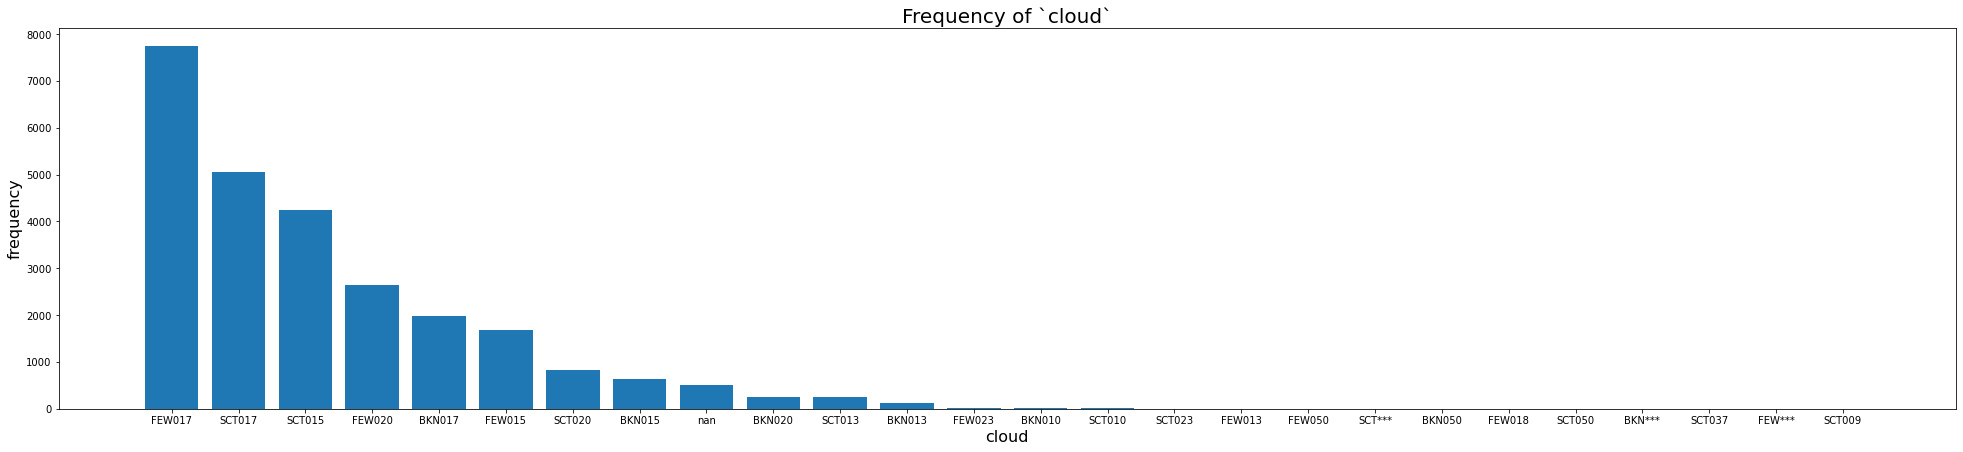

In [18]:
cloud_freq = value_frequency(all_df['clouds'])

print(cloud_freq)
print([v for v in cloud_freq["value"]])

# Plot
fig, ax = plt.subplots(figsize=(34, 7))
plt.bar(x=cloud_freq["value"].astype(str), height=cloud_freq["frequency"])
plt.title("Frequency of `cloud`", fontsize=20)
plt.xlabel("cloud", fontsize=16)
plt.ylabel("frequency", fontsize=16)

#### Số hóa cột `clouds`.

In [23]:
clouds_dict = {'BKN010':0, 'BKN013': 1, 'BKN015': 2, 'BKN017':3, 'BKN020':4, 
               'BKN050':5, 'BKN***':6, 'FEW013':7, 'FEW015':8, 'FEW017':9, 
               'FEW018':10, 'FEW020':11, 'FEW023':12, 'FEW050':13, 'FEW***':14, 
               'SCT009':15, 'SCT010':16, 'SCT013':17, 'SCT015':18, 'SCT017':19, 
               'SCT020':20, 'SCT023':21, 'SCT037':22, 'SCT050':23, 'SCT***':24}
print(len(clouds_dict), "\n")

all_df.replace({'clouds': clouds_dict}, inplace=True)
all_df

25 



,time,pressure,temperature,dewpoint_temperature,humidity,wind_direction,wind_speed,vision,clouds
0,2019-01-01 00:00,1013.0,24,18,69,350,4,10.0,18.0
1,2019-01-01 01:00,1014.0,24,18,69,350,5,10.0,9.0
2,2019-01-01 02:00,1014.0,25,19,69,350,5,10.0,9.0
3,2019-01-01 03:00,1014.0,27,19,62,360,6,10.0,19.0
4,2019-01-01 04:00,1014.0,27,19,62,360,6,10.0,9.0
...,...,...,...,...,...,...,...,...,...
26030,2021-12-31 19:00,1013.0,24,18,69,50.0,3,10.0,9.0
26031,2021-12-31 20:00,1013.0,24,18,69,20.0,3,10.0,9.0
26032,2021-12-31 21:00,1013.0,24,18,69,20.0,3,10.0,9.0
26033,2021-12-31 22:00,1013.0,23,18,73,30.0,2,10.0,9.0


# Xử lý tập dữ liệu nồng độ PM2.5 🎍

* Gộp các file dữ liệu nồng độ PM2.5
* Sửa cột `Date (LT)` theo format thời gian quy ước
* Chỉ lấy 2 cột có giá trị trong việc huấn luyện mô hình: `Date (LT)` và `Raw Conc.`
* Xóa các cột cùng giá trị cột `Date (LT)`
* Đổi tên cột

In [27]:
path = DATA_ROOT_DIR + "/data/raw_data/hcm_pm2.5_data/"

pm25_2019_df = pd.read_csv(path + "PM2.5_2019.csv")
pm25_2020_df = pd.read_csv(path + "PM2.5_2020.csv")
pm25_2021_df = pd.read_csv(path + "PM2.5_2021.csv")

pm25_df = pd.concat([pm25_2019_df, pm25_2020_df, pm25_2021_df], ignore_index=True)

# Ghép cột `Year`, `Month`, `Day`, `Hour` thành format quy ước
for i in range(len(pm25_df)):
  pm25_df['Date (LT)'][i] = str(pm25_df['Year'][i]) + "-" + str(pm25_df['Month'][i]).rjust(2, '0') + "-" + str(pm25_df['Day'][i]).rjust(2, '0') + " " +  str(pm25_df['Hour'][i]).rjust(2, '0') + ":00"

# Chỉ lấy giá trị 2 cột `Date (LT)` và `Raw Conc.`
pm25_df = pm25_df[['Date (LT)', 'Raw Conc.']]

# Xóa các dòng trùng giá trị cột `Date (LT)`
pm25_df.drop_duplicates(subset=['Date (LT)'], inplace=True, ignore_index=True)

# Đổi tên cột
pm25_df.rename(columns = {'Date (LT)':'time','Raw Conc.':'PM25_Concentration'}, inplace=True)
pm25_df

,time,PM25_Concentration
0,2019-01-01 01:00,10.0
1,2019-01-01 02:00,12.0
2,2019-01-01 03:00,11.0
3,2019-01-01 04:00,8.0
4,2019-01-01 05:00,14.0
...,...,...
25903,2021-12-31 20:00,28.0
25904,2021-12-31 21:00,30.0
25905,2021-12-31 22:00,23.0
25906,2021-12-31 23:00,19.0


### 🧨 Nối tập dữ liệu khí tượng và tập dữ liệu nồng độ PM2.5.

In [28]:
result_df = pm25_df.merge(all_df, on='time')
result_df = result_df[['time', 'temperature', 'dewpoint_temperature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'vision', 'clouds', 'PM25_Concentration']]
result_df

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
0,2019-01-01 01:00,24,18,1014.0,69,5,350,10.0,9.0,10.0
1,2019-01-01 02:00,25,19,1014.0,69,5,350,10.0,9.0,12.0
2,2019-01-01 03:00,27,19,1014.0,62,6,360,10.0,19.0,11.0
3,2019-01-01 04:00,27,19,1014.0,62,6,360,10.0,9.0,8.0
4,2019-01-01 05:00,28,20,1013.0,62,5,350,10.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...
25634,2021-12-31 19:00,24,18,1013.0,69,3,50.0,10.0,9.0,21.0
25635,2021-12-31 20:00,24,18,1013.0,69,3,20.0,10.0,9.0,28.0
25636,2021-12-31 21:00,24,18,1013.0,69,3,20.0,10.0,9.0,30.0
25637,2021-12-31 22:00,23,18,1013.0,73,2,30.0,10.0,9.0,23.0


Có một vài dữ liệu về hướng gió và nồng độ PM2.5 bị lỗi nên ta sẽ tiến hành thay thế các giá trị hướng gió nằm ngoài [0, 360] 
và các giá trị nồng độ PM2.5 nằm ngoài khoảng [0, 500] thành NaN.

In [29]:
# Thay thế
result_df['PM25_Concentration'] = result_df['PM25_Concentration'].apply(lambda x : np.nan if x < 0 else x)
result_df['PM25_Concentration'] = result_df['PM25_Concentration'].apply(lambda x : np.nan if x > 500 else x)

result_df['wind_direction'] = result_df['wind_direction'].apply(lambda x : 0 if x == 360 else x)
result_df['wind_direction'] = result_df['wind_direction'].apply(lambda x : np.nan if x < 0 else x)
result_df['wind_direction'] = result_df['wind_direction'].apply(lambda x : np.nan if x >= 360 else x)

result_df.reset_index(drop=True, inplace=True)
result_df

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
0,2019-01-01 01:00,24,18,1014.0,69,5,350.0,10.0,9.0,10.0
1,2019-01-01 02:00,25,19,1014.0,69,5,350.0,10.0,9.0,12.0
2,2019-01-01 03:00,27,19,1014.0,62,6,0.0,10.0,19.0,11.0
3,2019-01-01 04:00,27,19,1014.0,62,6,0.0,10.0,9.0,8.0
4,2019-01-01 05:00,28,20,1013.0,62,5,350.0,10.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...
25634,2021-12-31 19:00,24,18,1013.0,69,3,50.0,10.0,9.0,21.0
25635,2021-12-31 20:00,24,18,1013.0,69,3,20.0,10.0,9.0,28.0
25636,2021-12-31 21:00,24,18,1013.0,69,3,20.0,10.0,9.0,30.0
25637,2021-12-31 22:00,23,18,1013.0,73,2,30.0,10.0,9.0,23.0


In [30]:
# Lưu lại nếu lỗi thì thì không phải chạy lại từ đầu
def_df = result_df.copy()
# result_df = def_df.copy()

# Xử lý những khoảng thời gian bị thiếu trong data 🕒

Tạo _1 dataframe_ có chứa đầy đủ tất cả các giờ trong khoảng thời gian _2019-01-01 01:00_ đến _2021-12-31 23:00_.

In [32]:
# Số ngày trong tháng lần lượt từ 2019 -> 2021
day_num = [31,28,31,30,31,30,31,31,30,31,30,31,31,29,31,30,31,30,31,31,30,31,30,31,31,28,31,30,31,30,31,31,30,31,30,31]
arr = []
year = 2018

for i in range(len(day_num)):
  if i % 12 == 0:
    year+=1
  for j in range(day_num[i]):
    for k in range(24):
      arr.append(str(year) + "-" + str(i%12+1).rjust(2, '0') + "-" + str(j+1).rjust(2, '0') + " " + str(k).rjust(2, '0') + ":00")

day_num_df = pd.DataFrame(columns=['time'])
day_num_df['time'] = arr[1:]
day_num_df

,time
0,2019-01-01 01:00
1,2019-01-01 02:00
2,2019-01-01 03:00
3,2019-01-01 04:00
4,2019-01-01 05:00
...,...
26298,2021-12-31 19:00
26299,2021-12-31 20:00
26300,2021-12-31 21:00
26301,2021-12-31 22:00


Những giờ bị thiếu.

In [33]:
lost_hour_df = day_num_df[~day_num_df['time'].isin(result_df['time'])].dropna()
lost_hour_df

,time
66,2019-01-03 19:00
67,2019-01-03 20:00
68,2019-01-03 21:00
69,2019-01-03 22:00
70,2019-01-03 23:00
...,...
24565,2021-10-20 14:00
24703,2021-10-26 08:00
24705,2021-10-26 10:00
25379,2021-11-23 12:00


Thống kê.

In [34]:
lost_month_df = pd.DataFrame(columns=['time'])
lost_month_df['time'] = lost_hour_df['time'].astype(str).str[:7]

lost_month_freq = value_frequency(lost_month_df['time']).sort_values(by='value',ignore_index=True)
count = 0

for m in lost_month_freq.value:
  print(f'{m}:')
  h_lost = []
  for h in lost_hour_df['time']:
    if h[:7] == m:
      if h_lost and h_lost[-1][:2] != h[8:10]:
        print(f'\t{h_lost}')
        count += len(h_lost)
        h_lost = []
      h_lost.append(h[8:])
  print(f'\t{h_lost}')
  count += len(h_lost)

print(count == len(lost_hour_df))

2019-01:
	['03 19:00', '03 20:00', '03 21:00', '03 22:00', '03 23:00']
	['04 00:00', '04 01:00', '04 02:00', '04 03:00', '04 04:00', '04 05:00', '04 06:00', '04 07:00', '04 08:00', '04 09:00', '04 10:00', '04 11:00', '04 12:00', '04 13:00']
	['06 00:00']
	['22 22:00', '22 23:00']
	['23 00:00']
	['24 00:00']
2019-02:
	['13 12:00']
	['19 17:00', '19 18:00', '19 19:00']
2019-03:
	['01 15:00']
	['10 02:00']
	['23 15:00', '23 16:00', '23 17:00', '23 18:00', '23 19:00', '23 20:00', '23 21:00', '23 22:00', '23 23:00']
	['24 00:00', '24 01:00', '24 02:00', '24 03:00', '24 04:00', '24 05:00', '24 06:00', '24 07:00', '24 08:00', '24 09:00', '24 10:00', '24 11:00', '24 12:00', '24 13:00', '24 14:00', '24 15:00', '24 16:00', '24 17:00', '24 18:00', '24 19:00', '24 20:00', '24 21:00', '24 22:00', '24 23:00']
	['25 00:00', '25 01:00', '25 02:00', '25 03:00', '25 04:00', '25 05:00', '25 06:00', '25 07:00', '25 08:00', '25 09:00', '25 10:00', '25 11:00', '25 12:00', '25 13:00', '25 14:00', '25 15:00',

In [35]:
# Nối các ngày còn thiếu
result_df = pd.concat([result_df, lost_hour_df], ignore_index=True)

# Thay thế các giá trị NaN về cùng format np.nan
result_df = result_df.fillna(np.nan)

result_df.sort_values(by='time', inplace=True, ignore_index=True)
result_df

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
0,2019-01-01 01:00,24.0,18.0,1014.0,69.0,5.0,350.0,10.0,9.0,10.0
1,2019-01-01 02:00,25.0,19.0,1014.0,69.0,5.0,350.0,10.0,9.0,12.0
2,2019-01-01 03:00,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,19.0,11.0
3,2019-01-01 04:00,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,9.0,8.0
4,2019-01-01 05:00,28.0,20.0,1013.0,62.0,5.0,350.0,10.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...
26298,2021-12-31 19:00,24.0,18.0,1013.0,69.0,3.0,50.0,10.0,9.0,21.0
26299,2021-12-31 20:00,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,28.0
26300,2021-12-31 21:00,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,30.0
26301,2021-12-31 22:00,23.0,18.0,1013.0,73.0,2.0,30.0,10.0,9.0,23.0


💤 Thống kê các dòng có chứa giá trị NaN.

In [36]:
result_df[result_df.isnull().any(axis=1)]

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
50,2019-01-03 03:00,28.0,21.0,1014.0,66.0,2.0,NaN,10.0,8.0,19.0
62,2019-01-03 15:00,25.0,22.0,1013.0,83.0,3.0,20.0,10.0,18.0,NaN
63,2019-01-03 16:00,24.0,22.0,1012.0,89.0,3.0,10.0,10.0,19.0,NaN
64,2019-01-03 17:00,24.0,21.0,1012.0,83.0,2.0,NaN,10.0,19.0,NaN
65,2019-01-03 18:00,24.0,21.0,1012.0,83.0,1.0,NaN,10.0,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...
26249,2021-12-29 18:00,24.0,24.0,1012.0,100.0,1.0,NaN,10.0,18.0,23.0
26250,2021-12-29 19:00,24.0,24.0,1012.0,100.0,1.0,NaN,8.0,8.0,29.0
26255,2021-12-30 00:00,24.0,20.0,1014.0,78.0,1.0,NaN,10.0,9.0,13.0
26267,2021-12-30 12:00,28.0,21.0,1012.0,66.0,2.0,40.0,10.0,9.0,NaN


👉 Ta sẽ áp dụng kỹ thuật `Linear Interpolation` để xử lý dữ liệu bị lỗi NaN với `window_size=3`.

In [38]:
for i in range(1, len(result_df) - 1):
  for col in result_df.columns:
    if col != 'time':
      if not np.isnan(result_df[col][i-1]) and not np.isnan(result_df[col][i+1]) and np.isnan(result_df[col][i]):
        result_df[col][i] = (result_df[col][i-1] + result_df[col][i+1]) / 2

💌 Sau khi xử lý xong, ta thống kê lại các dòng có chứa giá trị NaN.

In [39]:
result_df[result_df.isnull().any(axis=1)]

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
62,2019-01-03 15:00,25.0,22.0,1013.0,83.0,3.0,20.0,10.0,18.0,NaN
63,2019-01-03 16:00,24.0,22.0,1012.0,89.0,3.0,10.0,10.0,19.0,NaN
64,2019-01-03 17:00,24.0,21.0,1012.0,83.0,2.0,NaN,10.0,19.0,NaN
65,2019-01-03 18:00,24.0,21.0,1012.0,83.0,1.0,NaN,10.0,19.0,NaN
66,2019-01-03 19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26240,2021-12-29 09:00,31.0,21.0,1010.0,55.0,2.0,NaN,10.0,19.0,38.0
26247,2021-12-29 16:00,25.0,24.0,1013.0,94.0,1.0,NaN,10.0,18.0,14.0
26248,2021-12-29 17:00,25.0,24.0,1013.0,94.0,1.0,NaN,10.0,18.0,16.0
26249,2021-12-29 18:00,24.0,24.0,1012.0,100.0,1.0,NaN,10.0,18.0,23.0


🧭 Tập dữ liệu còn lại sẽ chứa ít nhất 2 giá trị NaN cạnh nhau, không thể xử lý được với `window_size=3`. Do đó, ta sẽ tiến hành loại bỏ chúng. 

In [40]:
result_df = result_df.dropna()
result_df.reset_index(drop=True, inplace=True)
result_df[result_df.isnull().any(axis=1)]

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration


In [41]:
result_df

,time,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
0,2019-01-01 01:00,24.0,18.0,1014.0,69.0,5.0,350.0,10.0,9.0,10.0
1,2019-01-01 02:00,25.0,19.0,1014.0,69.0,5.0,350.0,10.0,9.0,12.0
2,2019-01-01 03:00,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,19.0,11.0
3,2019-01-01 04:00,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,9.0,8.0
4,2019-01-01 05:00,28.0,20.0,1013.0,62.0,5.0,350.0,10.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...,...
21022,2021-12-31 19:00,24.0,18.0,1013.0,69.0,3.0,50.0,10.0,9.0,21.0
21023,2021-12-31 20:00,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,28.0
21024,2021-12-31 21:00,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,30.0
21025,2021-12-31 22:00,23.0,18.0,1013.0,73.0,2.0,30.0,10.0,9.0,23.0


## Đếm tần suất của các cột `CLOUD()` và `wind_direction` 🎃

### Cột `wind_direction` 🎯

---



    value  frequency
0     0.0        723
1     5.0         14
2    10.0        323
3    15.0         17
4    20.0        383
..    ...        ...
66  330.0        256
67  335.0          7
68  340.0        176
69  345.0          5
70  350.0        238

[71 rows x 2 columns]


Text(0, 0.5, 'frequency')

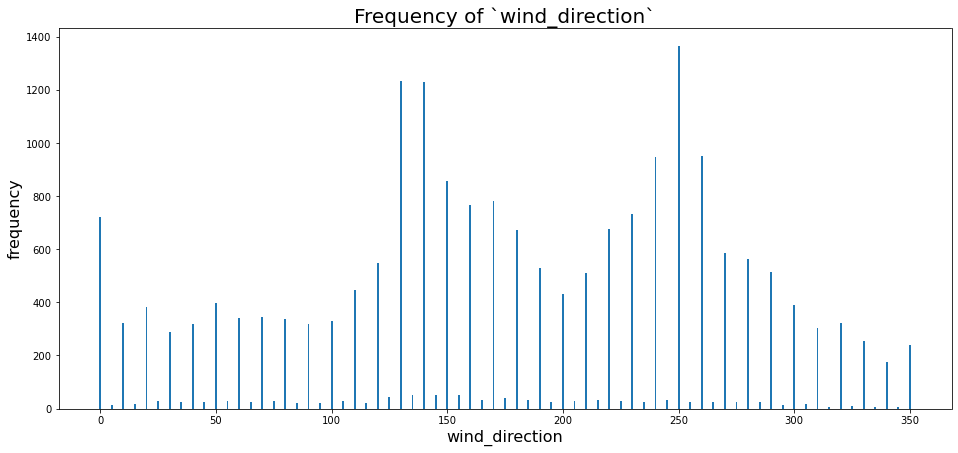

In [42]:
dir_freq = value_frequency(result_df['wind_direction']).sort_values(by='value',ignore_index=True)
print(dir_freq)

# Plot
fig, ax = plt.subplots(figsize=(16, 7))
plt.bar(x=dir_freq["value"], height=dir_freq["frequency"])
plt.title("Frequency of `wind_direction`", fontsize=20)
plt.xlabel("wind_direction", fontsize=16)
plt.ylabel("frequency", fontsize=16)

# Tìm tương quan giữa các đặc trưng 🚧

In [43]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

In [44]:
tmp_df = result_df[['temperature','dewpoint_temperature','pressure','humidity','wind_speed','wind_direction','vision','clouds','PM25_Concentration']]
tmp_df

,temperature,dewpoint_temperature,pressure,humidity,wind_speed,wind_direction,vision,clouds,PM25_Concentration
0,24.0,18.0,1014.0,69.0,5.0,350.0,10.0,9.0,10.0
1,25.0,19.0,1014.0,69.0,5.0,350.0,10.0,9.0,12.0
2,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,19.0,11.0
3,27.0,19.0,1014.0,62.0,6.0,0.0,10.0,9.0,8.0
4,28.0,20.0,1013.0,62.0,5.0,350.0,10.0,19.0,14.0
...,...,...,...,...,...,...,...,...,...
21022,24.0,18.0,1013.0,69.0,3.0,50.0,10.0,9.0,21.0
21023,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,28.0
21024,24.0,18.0,1013.0,69.0,3.0,20.0,10.0,9.0,30.0
21025,23.0,18.0,1013.0,73.0,2.0,30.0,10.0,9.0,23.0


<AxesSubplot:>

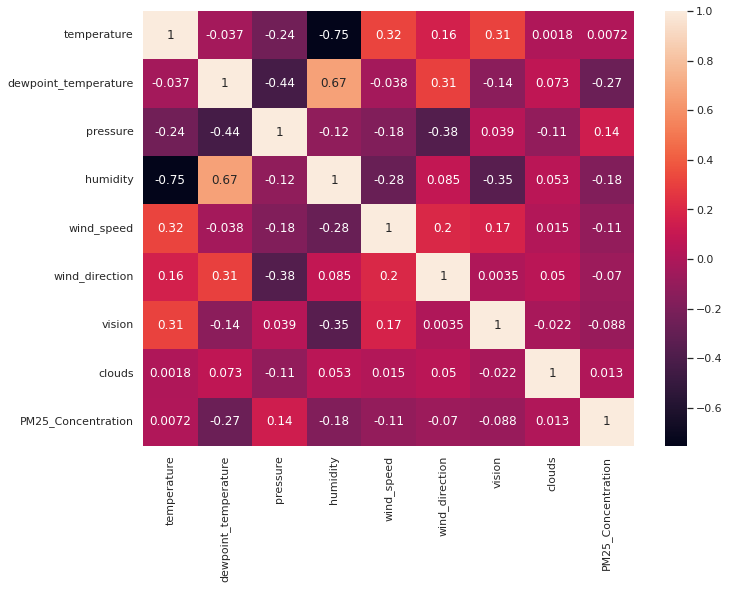

In [45]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(tmp_df.corr(), annot=True)

# Xuất ra file `.csv` 🚀

In [47]:
result_df.to_csv(DATA_ROOT_DIR+"/data/training_data/clean_data.csv", index=False)

In [48]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  21027 non-null  object 
 1   temperature           21027 non-null  float64
 2   dewpoint_temperature  21027 non-null  float64
 3   pressure              21027 non-null  float64
 4   humidity              21027 non-null  float64
 5   wind_speed            21027 non-null  float64
 6   wind_direction        21027 non-null  float64
 7   vision                21027 non-null  float64
 8   clouds                21027 non-null  float64
 9   PM25_Concentration    21027 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
